In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud

#### Ejercicio 4

In [3]:
# Obtiene palabras a partir de una string de texto. Elimina puntuación.
def separar_texto(pals):
    parsed = pals.split(' ')
    quitar_elems = [",",".",";","(",")",'*','=','+','-','%','/',"_","&","1","2","3","4","5","6","7","8","9","0","[","]","\\",":"]
    for elem in quitar_elems:
        parsed = [str.replace(elem,"") for str in parsed]
    borrar_elems = ['', '\n', '\r\n','*','=','+','-','%','/',"(",")","&","\\"]
    for elem in borrar_elems:
        parsed = list(filter((elem).__ne__, parsed))
    parsed = [i for i in parsed if len(i) > 1]
    return parsed

# Genera un diccionario a partir de una lista de palabras que contiene la cantidad de apariciones de cada palabra.
def generar_dic(pals_sep):
    res_dict = {}
    for pal in pals_sep:
        if(pal.lower() in res_dict):
            res_dict[pal.lower()] += 1;
        else:
            res_dict[pal.lower()] = 1;
    return res_dict    
    

#### Ejercicio 5

In [4]:
texto = """Sherlock Holmes is a fictional private detective created by British author Sir Arthur Conan Doyle. Referring to himself as a consulting detective in the stories, Holmes is known for his proficiency with observation, deduction, forensic science, and logical reasoning that borders on the fantastic, which he employs when investigating cases for a wide variety of clients, including Scotland Yard."""
#generar_dic(separar_texto(texto))

#### Ejercicio 6

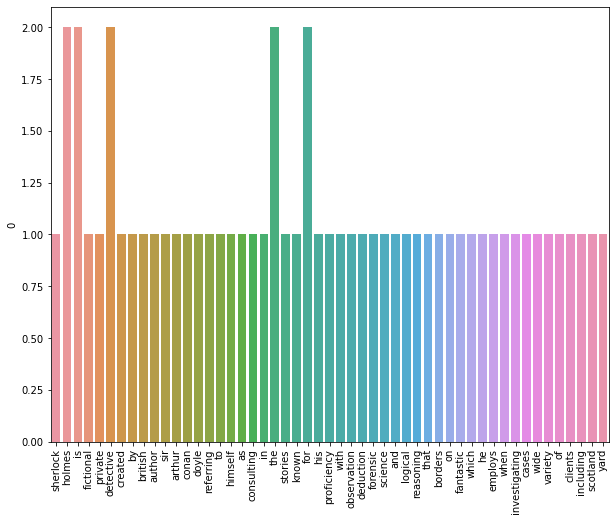

In [5]:
freq_pals = generar_dic(separar_texto(texto))
df = pd.DataFrame.from_dict(freq_pals,orient='index')
fig = plt.figure(figsize=(10,8))
sns.barplot(x=df.index,y=df[0]);
plt.xticks(rotation=90);

#### Ejercicio 7

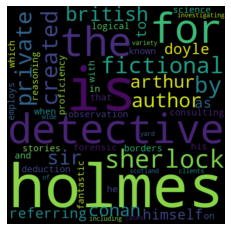

In [6]:
wordcloud = WordCloud(width=480, height=480, margin=0)
wordcloud.generate_from_frequencies(freq_pals)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)

#### Ejercicio 8

In [7]:
def generar_dict_filt(palabras_separadas,palabras_filtro,n):
    res_dict = {}
    for pal in palabras_separadas:
        if(pal.lower() not in palabras_filtro):
            if(pal.lower() in res_dict):
                res_dict[pal.lower()] += 1;
            else:
                res_dict[pal.lower()] = 1;
    while(len(res_dict)>n):
        # Erase least common words until we get desired length
        del res_dict[min(res_dict, key=res_dict.get)]
    return res_dict

In [8]:
generar_dict_filt(separar_texto(texto),['is','a','the','for','by','as','in','to','and','of','his','he','on','when'],5)

{'holmes': 2, 'detective': 2, 'including': 1, 'scotland': 1, 'yard': 1}

#### Ejercicio 9

In [4]:
#"A study in scarlet" Arthur Conan Doyle
link_study = "http://www.gutenberg.org/files/244/244-h/244-h.htm"
#"The man who was a thursday nightmare" Chesterton
link_man = "http://www.gutenberg.org/files/1695/1695-h/1695-h.htm"
#"Whose body?" Dorothy L Sayers
link_body = "http://www.gutenberg.org/files/58820/58820-h/58820-h.htm"
list_filtro=["our","me","they","the","at","there","some","my","of","be","her","than","and","this","an","would","a","have","each","make","to","from","which","like","been","in","or","she","him","call","is","one","do","into","who","you","had","how","that","by","their","has","its","it","if","now","he","but","will","find","was","not","up","more","long","for","what","other","write","down","on","all","about","go","day","are","were","out","see","did","as","we","many","number","get","with","when","then","no","come","his","your","them","way","made","they","can","these","could","may","i","said","so","people"]

Cargamos el texto

In [2]:
import html2text
import requests
    from scrapy.http import TextResponse

def get_text(link):
    r = requests.get(link)
    response = TextResponse(r.url, body=r.text, encoding='utf-8')

    converter=html2text.HTML2Text()
    converter.ignore_links=True
    converter.ignore_images=True
    converter.ignore_tables=True
    text=converter.handle(response.css('*').get())
    text=text.encode('ascii','ignore')
    text=text.decode('utf-8')
    name = response.url.split('/')[2]
    print(name)
    return text

In [5]:
texto_study = get_text(link_study)

www.gutenberg.org


Generamos el histograma y la wordcloud

In [12]:
def generar_hist_y_wordcloud(freq_pals):    
    plt.figure(figsize=(16,6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=list(freq_pals.keys()),y=list(freq_pals.values()));
    plt.xticks(rotation=90);

    plt.subplot(1, 2, 2)
    wordcloud = WordCloud(width=480, height=480, margin=0)
    wordcloud.generate_from_frequencies(freq_pals)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)

In [13]:
freq_pals_study = generar_dict_filt(separar_texto(texto_study),list_filtro,20)

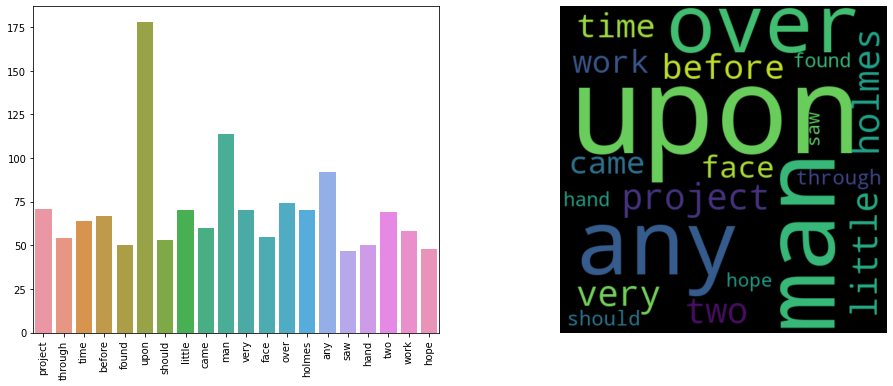

In [14]:
generar_hist_y_wordcloud(freq_pals_study)

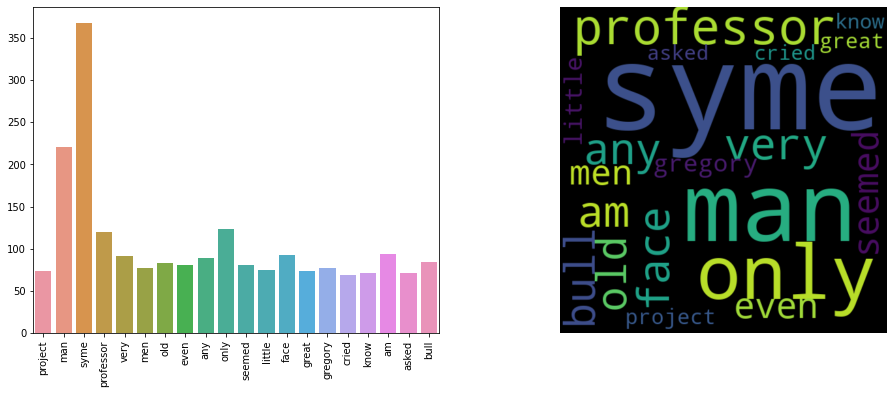

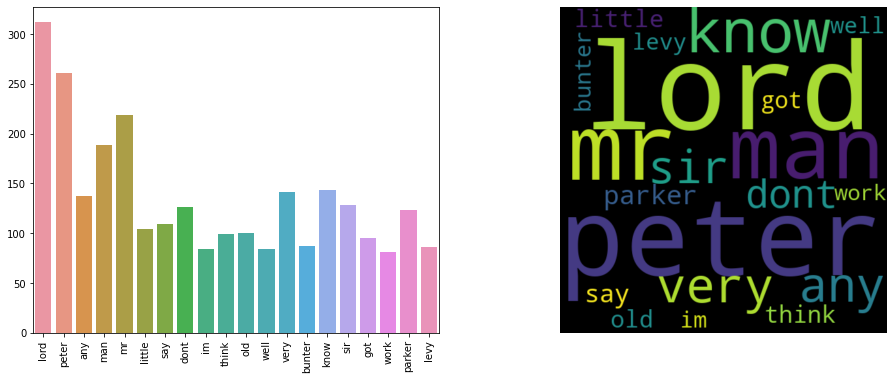

In [15]:
texto_man = get_text(link_man)
freq_pals_man = generar_dict_filt(separar_texto(texto_man),list_filtro,20)
generar_hist_y_wordcloud(freq_pals_man)

texto_body = get_text(link_body)
freq_pals_body = generar_dict_filt(separar_texto(texto_body),list_filtro,20)
generar_hist_y_wordcloud(freq_pals_body)

#### Ejercicio 10

In [16]:
link_art1 = "https://doi.org/10.1371/journal.pone.0005738"
link_art2 = "https://doi.org/10.1109/LRA.2020.2966414"
link_art3 = "https://doi.org/10.1371/journal.pone.0108895"

In [17]:
# Redefino esta función para que ahora haga TODO y solo le paso el link, lista filtro y n
def generar_hist_y_wordcloud(link,list_filtro,n):
    print("Obteniendo texto ["+link+"]...")
    texto = get_text(link)
    
    print("Obteniendo frecuencias y filtrando...")
    freq_pals = generar_dict_filt(separar_texto(texto),list_filtro,n)
    
    print("Generando graficos...")
    plt.figure(figsize=(16,6))
    plt.subplot(1, 2, 1)
    sns.barplot(x=list(freq_pals.keys()),y=list(freq_pals.values()));
    plt.xticks(rotation=90);

    plt.subplot(1, 2, 2)
    wordcloud = WordCloud(width=480, height=480, margin=0)
    wordcloud.generate_from_frequencies(freq_pals)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.margins(x=0, y=0)

In [18]:
#list_filtro_ciencia = list_filtro+["study","ieee","science","studies","data","article","google","analysis","scientific","scientists","view","between"]
list_filtro_ciencia = list_filtro

Obteniendo texto [https://doi.org/10.1371/journal.pone.0005738]...
Obteniendo frecuencias y filtrando...
Generando graficos...
Obteniendo texto [https://doi.org/10.1109/LRA.2020.2966414]...
Obteniendo frecuencias y filtrando...
Generando graficos...
Obteniendo texto [https://doi.org/10.1371/journal.pone.0108895]...
Obteniendo frecuencias y filtrando...
Generando graficos...


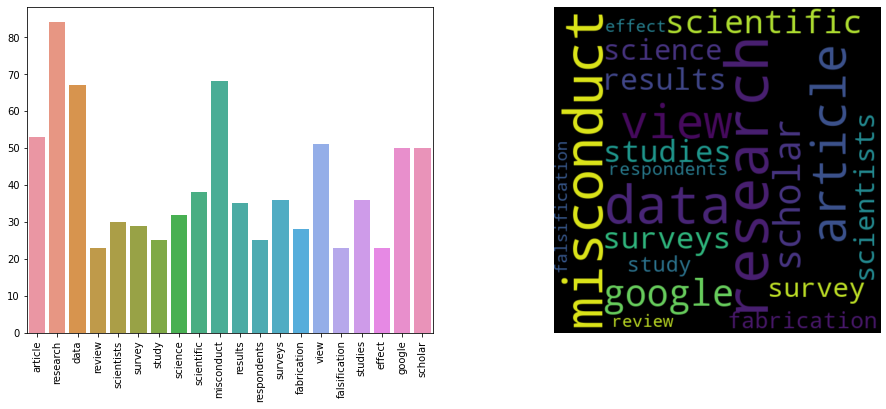

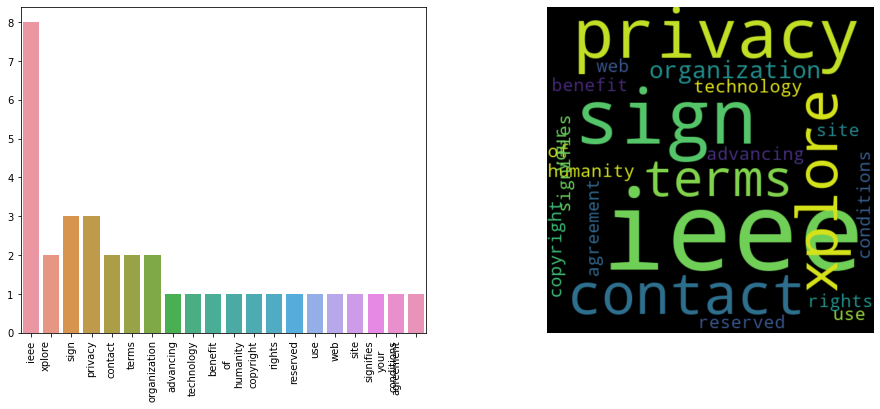

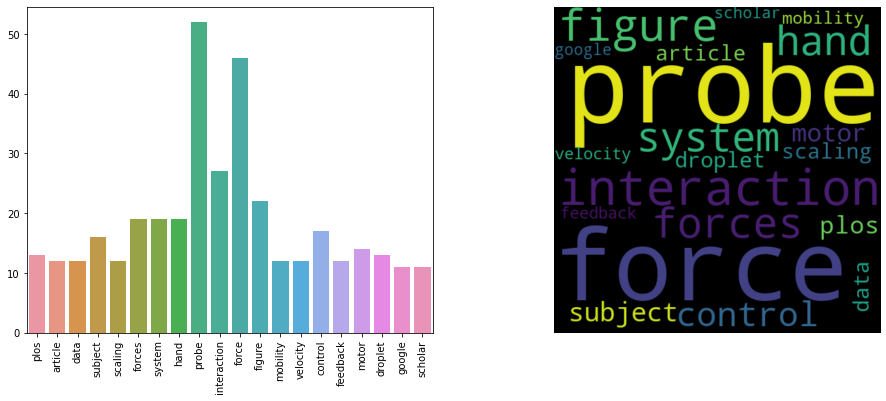

In [204]:
generar_hist_y_wordcloud(link_art1,list_filtro_ciencia,20)
generar_hist_y_wordcloud(link_art2,list_filtro_ciencia,20)
generar_hist_y_wordcloud(link_art3,list_filtro_ciencia,20)

### [!!!] La nube del segundo articulo esta rota porque no se fetchea el articulo, solo un texto previo de login

#### Comentarios finales

- En los libros no se ven tantas palabras en comun, pero puede ser porque creo que realicé un filtrado excesivo. En los artículos algunas palabras comunes parecen ser article, science, scientists, etc. Habíamos incluído un filtro de estas palabras más comunes para ver cuales eran las palabras más usadas que eran relevantes al tema de cada artículo, pero lo sacamos. Se puede colocar descomentando la primer linea y comentando la segunda donde se define list_filtro_ciencia
- Teníamos símbolos como &, \*, +, etc pero los filtramos ya que no eran palabras, en separar_texto. Mismo para números.
- Se mencionan más nombres propios en los libros que en los artículos. 